<a href="https://colab.research.google.com/github/YNWA-Algo/Boston-Real-Estate/blob/main/BostonRealEstate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dataframe, stats libraries for the evaluation

In [ ]:
import scipy.stats
import pandas as pd
import numpy as np

Import visualization libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Access the Boston Area realestate data from the URL

In [ ]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

Display Information about Dataset
- First number of rows and columns
- Get informtion on each variable
-print out first 5 rows of data



In [ ]:
boston_df.shape

(506, 14)

In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [ ]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Descriptive statistics table for the data set

In [ ]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Median value of owner occupied homes in 0000s. The median value is just over 20K. Some outliers that extend the interquatile range

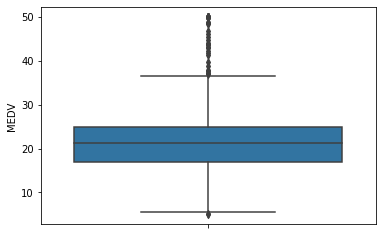

In [ ]:
ax = sns.boxplot( y="MEDV", data=boston_df)

bar plot of Charles River.

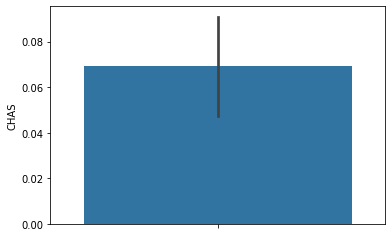

In [ ]:
ax = sns.barplot(y="CHAS", data=boston_df)

Boxplot for the MEDV (median value) variable vs. Age variable. (Discretize by < 35, 35 to 70, > 70)

In [ ]:
boston_df.loc[(boston_df['AGE']<= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE']>= 70), 'age_group'] = '70 years and older'

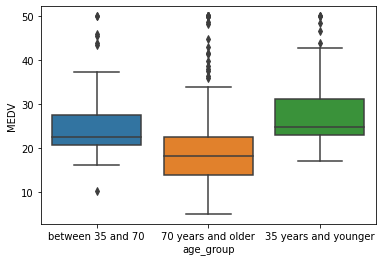

In [ ]:
ax = sns.boxplot(y ="MEDV", x="age_group", data=boston_df)
#CONCLUSIONS The youngger the age, the higher the median price.

Evaluate the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

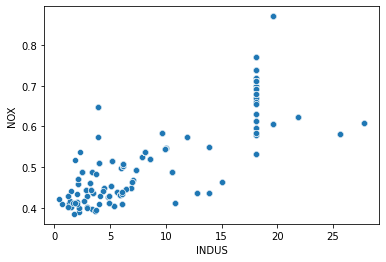

In [ ]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
#Inference - by simply eyeballing. I see a correlation that is positive meaining higher NOX = higher INDUS

Create a histogram for the pupil to teacher ratio variable

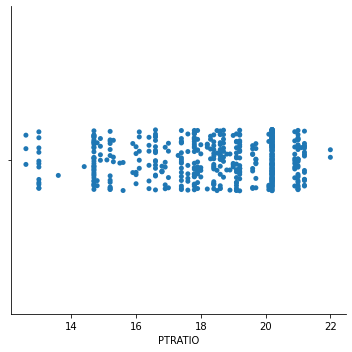

In [ ]:
sns.catplot(x='PTRATIO', data=boston_df)

Is there a significant difference in median value of houses bounded by the Charles river or not?

Null = There's is no significant difference in the median value of houses bounded by the Charles river or not

- Plot the variable to "eyeball" the distribution. WIll assume normality - although there's some sort of a second bump that suggests bimodality but will research this later as needed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

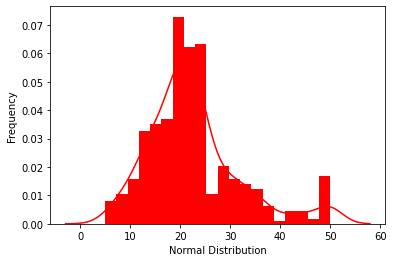

In [ ]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

Next; perform Levene test to see if the variance is equal or not across the two sets (i.e bounded by charles river or not)

In [ ]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1 ]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')
#Since p value is less than .05, we can assume variance is not equal. In the t-test below, we then set equal to false

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [ ]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1 ]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0 ]['MEDV'], equal_var = False)
#CONCLUSION - Since p value is less that the alpha value of .05, we reject the null hypothesis that there is no difference in the median value of the houses bounded by the Charles river.
# In simple terms homes that are bounded by the charles river havea different median prices (impact of the river)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**Is there a difference in Median values for each proportion of owner occupied units built prior to 1940(AGE) ?  - ANOVA**

NULL hypothesis is that the 3 popoulations across the age categories 35 & younger, between 35 and 70 and 70 years and older are equal.  Alternate is that at least one mean is not equal

Test for equality of variance

In [ ]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
                   center='mean')
#Since the p-value is greater that 0.05, the variances are equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

To perform the ANOVA, I want to seperate the 3 samples per the age categories and assign them to their own specific variables

In [ ]:
Thirtyfive_Lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
Thirtyfive_Seventy = boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
Seventy_Older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']


Run one way anova

In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(Thirtyfive_Lower, Thirtyfive_Seventy, Seventy_Older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
#CONCLUSION is that p-value is less that 0.05, null is rejected as there is significant evidence that at least one of the means differ

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


***Can we conclude that there is no relationship between Nitric Oxide concentrations (NOX) and the proportion of non-retail business acres per town(INDUS)? (Pearson Correlation) ***

NULL Hypothesis is - there is no relationship between nitric oxide concentrations and the proportion of non-retail business acres per town

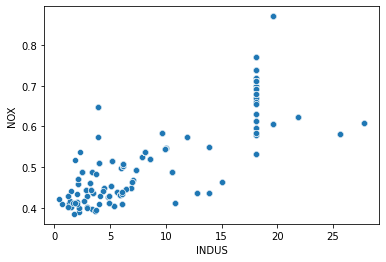

In [ ]:
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)

In [ ]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
#CONCLUSION - since the p value is less than 0.05 for this 2-tailed test, we reject the null and conclude that there is a relationship between the NOX conc and the proprtion of non ret business per acre.
# The more NoX the more the INDUS

(0.7636514469209151, 7.913361061238693e-98)

What is the impact of additonal weighted distance (DIS) to the five boston employment centers on the median value (MEDV) of owner occupied homes ?  #Regression analysis

NULL hypothesis is distance to the boston employment center has no impact on the median value of homes

In [ ]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           1.21e-08
Time:                        23:06:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**CONCLUSION **- P value is less than 0.05, the distance to boston employement center has an impact on Median house prices. there is decent correlation at R-sq of .062. The closer to a boston employment center by 1.0916 the impact on median price